In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
learning_epochs = 40

Initialize data

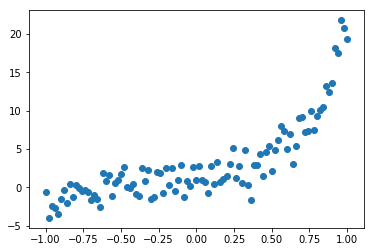

In [27]:
trX = np.linspace(-1, 1, 101)

num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]

trY = 0
for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

trY += np.random.randn(*trX.shape) * 1.5
    
plt.scatter(trX, trY)
plt.show()

Describe the model

In [28]:
X = tf.placeholder(dtype="float")
Y = tf.placeholder(dtype="float")

def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

cost = tf.square(Y - y_model)

Init and run session

In [29]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(learning_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})

w_val = sess.run(w)
print(w_val)

sess.close()

[ 1.01893473  2.09060001  3.6878078   4.71843767  4.10481071  5.1666851 ]


Plot data

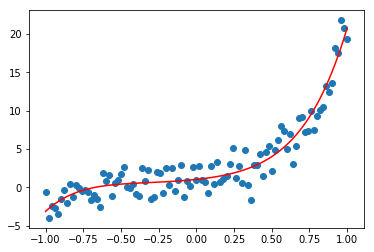

In [30]:
plt.scatter(trX, trY)

trained_y = 0
for i in range(num_coeffs):
    trained_y += w_val[i] * np.power(trX, i)
    
plt.plot(trX, trained_y, "r")
plt.show()